# MODELING

Ở bước này, em sẽ sử dụng 2 Model Regression là: Lasso Regression và Ridge Regression.

**Lý do:**
1. Khả năng cài đặt: Do đây là 2 Model khá phù hợp để thử sức cài đặt bằng **NumPy**. Không quá dễ như Linear Regression thường nhưng cũng không quá khó để có thể có thể hiểu được code.
2. Khảo sát Features: Tuy không gặp vấn đề *Đa cộng tuyến*, nhưng do dữ liệu có khá nhiều features nên em muốn khảo sát: "Sẽ tốt hơn nếu giữ toàn bộ features không có độ tương quan quá cao hay dùng *Feature Selection* để dùng những feature thật sự có ảnh hưởng đến Model.
3. Quan sát nhiều hơn về **hàm Lasso**: Sở dĩ có thể đưa ra 2 lý do trên là do Lab 03 môn Nhập môn Học máy em có cơ hội được nghiên cứu khá kỹ về hàm Lasso (L1) và muốn khai thác thêm về bài toán này ở một góc độ mới.

**Dự đoán trước kết quả:**
1. Hiệu suất: Do bản chất dữ liệu Airbnb chứa nhiều mối quan hệ phi tuyến phức tạp và nhiễu, em dự đoán $R^2$ sẽ đạt ngưỡng trần (ceiling) ở mức 0.55 - 0.65. Khó có thể cao hơn nếu chỉ dùng Linear Model.
2. So sánh: Ridge có thể sẽ cho $R^2$ cao hơn một chút do giữ lại toàn bộ thông tin. Lasso sẽ làm cho nhiều hệ số $w$ về 0, giúp mô hình gọn nhẹ và dễ giải thích hơn.

**Hướng tiếp cận tốt hơn:**

Nếu không bị giới hạn bởi yêu cầu cài đặt bằng **NumPy** và độ phức tạp của Model, em sẽ dùng các mô hình Decision Tree như *Random Forest* hoặc *XGBoost*. Các mô hình này có khả năng tự học các tương tác phi tuyến và xử lý các giá trị ngoại lai tốt hơn hẳn so với Ridge hay Lasso.


## I. IMPORT THƯ VIỆN

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sys
sys.path.append("..")

import src

### PHIÊN BẢN NUMPY SỬ DỤNG

In [2]:
np.set_printoptions(suppress=True, precision=6, linewidth=150)
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

print("Numpy version:", np.__version__)

Numpy version: 2.2.3


## II. ĐỌC DỮ LIỆU & CHIA TẬP TRAIN/TEST

### 1. ĐỌC DỮ LIỆU

In [3]:
data_path = "../data/processed/"
data = np.load(f"{data_path}AB_NYC_2019_processed.npz")
X, y = data['X'], data['y']
feature_names = np.load(f"{data_path}AB_NYC_2019_feature_names.npy")

print(f"Loaded X: {X.shape}, y: {y.shape}")

Loaded X: (47649, 15), y: (47649,)


### 2. CHIA TẬP TRAIN/TEST

In [4]:
X_train, X_test, y_train, y_test = src.train_test_split_numpy(X, y, test_size=0.2)

print(f"\nTrain set: {X_train.shape}")
print(f"\nTest set: {X_test.shape}")


Train set: (38120, 15)

Test set: (9529, 15)


### 3. CHUẨN HÓA DỮ LIỆU

In [5]:
scaler_mean = np.mean(X_train, axis=0)
scaler_std = np.std(X_train, axis=0)

scaler_std[scaler_std == 0] = 1 

scaler_mean[0] = 0
scaler_std[0] = 1

X_train_scaled = (X_train - scaler_mean) / scaler_std

Áp dụng Mean/Std CỦA TRAIN cho X_TEST

In [6]:
X_test_scaled = (X_test - scaler_mean) / scaler_std

In [7]:
print("Standardization completed using Train set statistics.")
print(f"Train Scaled Mean (approx 0): {np.mean(X_train_scaled[:, 1]):.4f}") # Test thử cột 1
# Mean của Test set sẽ KHÔNG bằng 0, điều này là bình thường và đúng đắn
print(f"Test Scaled Mean (variable):   {np.mean(X_test_scaled[:, 1]):.4f}")

X_train = X_train_scaled
X_test = X_test_scaled

Standardization completed using Train set statistics.
Train Scaled Mean (approx 0): 0.0000
Test Scaled Mean (variable):   -0.0011


### 4. Kiểm tra dữ liệu

In [8]:
#3–5 dòng của X_train (scaled) và y_train
src.describe(X_train, feature_names)

src.describe(y_train, ["price"])

            Intercept           Minimum_nights      number_of_reviews   reviews_per_month   host_count          availability_365    distance_to_center  Bronx               Brooklyn            Manhattan           Queens              Staten Island       Entire home/apt     Private room        Shared room         
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
count       38120.0000          38120.0000          38120.0000          38120.0000          38120.0000          38120.0000          38120.0000          38120.0000          38120.0000          38120.0000          38120.0000          38120.0000          38120.0000          38120.0000          38120.0000          
mean        1.0000              0.0000              0.0000   

## III. METRICS
Vì ngắn gọn, có giá trị thể hiện cao nên em sẽ để ở Notebook 1 lần nữa (đã có ở `models.py`)

In [9]:
if False:
    def rmse_score(y_true, y_pred):
        return np.sqrt(np.mean((y_true - y_pred)**2))

    def r2_score(y_true, y_pred):
        ss_res = np.sum((y_true - y_pred)**2)
        ss_tot = np.sum((y_true - np.mean(y_true))**2)
        return 1 - (ss_res / ss_tot)

## IV. MÔ HÌNH RIDGE REGRESSION
Vì ngắn gọn, có giá trị thể hiện cao nên em sẽ để ở Notebook 1 lần nữa (đã có ở `models.py`)

In [10]:
if False:
    class RidgeRegression:
        def __init__(self, alpha=1.0):
            self.alpha = alpha
            self.weights = None
            
        def fit(self, X, y):
            n_features = X.shape[1]
            
            I = np.eye(n_features)

            I[0, 0] = 0 

            xtx = X.T @ X
            xty = X.T @ y
            
            matrix_to_invert = xtx + self.alpha * I
            
            self.weights = np.linalg.solve(matrix_to_invert, xty)
            
        def predict(self, X):
            return X @ self.weights


## V. MÔ HÌNH LASSO REGRESSION
Vì ngắn gọn, có giá trị thể hiện cao nên em sẽ để ở Notebook 1 lần nữa (đã có ở `models.py`)

In [11]:
if False:
    class LassoRegression:
        def __init__(self, alpha=0.1, max_iter=1000, tol=1e-4):
            self.alpha = alpha
            self.max_iter = max_iter
            self.tol = tol
            self.weights = None
            self.cost_history = []

        def _soft_threshold(self, rho, lam):
            if rho < - lam:
                return rho + lam
            elif rho > lam:
                return rho - lam
            else:
                return 0

        def fit(self, X, y):
            n_samples, n_features = X.shape
            self.weights = np.zeros(n_features)
            
            x_sq = np.sum(X**2, axis=0)
            
            for iteration in range(self.max_iter):
                max_w_change = 0
                
                for j in range(n_features):
                    old_w = self.weights[j]
                    
                    if j == 0:
                        y_pred_no_j = X @ self.weights - X[:, j] * old_w
                        residual = y - y_pred_no_j
                        rho = np.dot(X[:, j], residual)
                        self.weights[j] = rho / x_sq[j] 
                    else:
                        y_pred_no_j = X @ self.weights - X[:, j] * old_w
                        residual = y - y_pred_no_j
                        rho = np.dot(X[:, j], residual)
                        
                        self.weights[j] = self._soft_threshold(rho, self.alpha) / x_sq[j]
                    
                    max_w_change = max(max_w_change, abs(self.weights[j] - old_w))
                
                if max_w_change < self.tol:
                    break
                    
        def predict(self, X):
            return X @ self.weights


## VI. HUẤN LUYỆN VÀ SO SÁNH KẾT QUẢ

### 1. RIDGE REGRESSION

In [12]:
# do loss function em dùng SSE nên alpha phải khủng mới có khác biệt so với linear
ridge_alphas = [1, 10, 50, 100, 200, 500]

best_alpha_ridge, ridge_results = src.grid_search_cv(
    src.RidgeRegression, 
    X_train, y_train, 
    ridge_alphas, 
    k=5
)



Best Alpha: 50 | Best R2: 0.5721


In [13]:
ridge = src.RidgeRegression(alpha=best_alpha_ridge)
ridge.fit(X_train, y_train)

y_pred_ridge = ridge.predict(X_test)

In [14]:
r2_ridge = src.r2_score(y_test, y_pred_ridge)
rmse_ridge = src.rmse_score(y_test, y_pred_ridge)
print(f"Ridge R2: {r2_ridge:.4f}")
print(f"Ridge RMSE: {rmse_ridge:.4f}")

Ridge R2: 0.5671
Ridge RMSE: 0.4019


### 2. LASSO REGRESSION

In [15]:
# do loss function em dùng SSE nên alpha phải khủng mới có khác biệt so với linear
lasso_alphas = [1, 10, 50, 100, 200, 500]

best_alpha_lasso, lasso_results = src.grid_search_cv(
    src.LassoRegression, 
    X_train, y_train, 
    lasso_alphas, 
    k=5
)


Best Alpha: 10 | Best R2: 0.5721


In [16]:
lasso = src.LassoRegression(alpha=best_alpha_lasso, max_iter=1000)
lasso.fit(X_train, y_train)

y_pred_lasso = lasso.predict(X_test)

In [17]:
r2_lasso = src.r2_score(y_test, y_pred_lasso)
rmse_lasso = src.rmse_score(y_test, y_pred_lasso)
print(f"Lasso R2: {r2_lasso:.4f}")
print(f"Lasso RMSE: {rmse_lasso:.4f}")

Lasso R2: 0.5671
Lasso RMSE: 0.4019


### BASELINE (Linear Regression)

Để có thể mang đến những kết luận khách quan nhất. Em sẽ so sánh kết quả dự đoán của Lasso Regression và Ridge Regression với Linear Regression.

Do đã cài đặt `class RidgeRegression` rồi nên em sẽ tận dụng nó để tạo model Linear Regression (bằng cách đặt alpha gần như = 0).

In [18]:
linear_model = src.RidgeRegression(alpha=1e-10) 
linear_model.fit(X_train, y_train)

In [19]:
y_pred_linear = linear_model.predict(X_test)

In [20]:
r2_linear = src.r2_score(y_test, y_pred_linear)
rmse_linear = src.rmse_score(y_test, y_pred_linear)

In [21]:
print(f"Linear Regression R2:   {r2_linear:.4f}")
print(f"Linear Regression RMSE: {rmse_linear:.4f}")

Linear Regression R2:   0.5671
Linear Regression RMSE: 0.4019


### **Kết quả của 3 Model**

In [22]:
print(f"\n{'MODEL':<25} | {'R2 SCORE':<10} | {'RMSE':<10}")
print("-" * 50)
print(f"{'Linear Regression':<25} | {r2_linear:.4f}     | {rmse_linear:.4f}")
print(f"{'Ridge (L2)':<25} | {r2_ridge:.4f}     | {rmse_ridge:.4f}")
print(f"{'Lasso (L1)':<25} | {r2_lasso:.4f}     | {rmse_lasso:.4f}")


MODEL                     | R2 SCORE   | RMSE      
--------------------------------------------------
Linear Regression         | 0.5671     | 0.4019
Ridge (L2)                | 0.5671     | 0.4019
Lasso (L1)                | 0.5671     | 0.4019


Kết quả bất ngờ là cả 3 mô hình đều ra kết quả như nhau. Sau khi nhận kết quả này, em đã tiến hành kiểm tra lại 3 model và phát hiện cả 3 đều hoạt động đúng (Em kiểm tra bằng cách đặt alpha thiệt cao để phạt nặng hơn và phát hiện R2-score thực sự bị ảnh hưởng).

Điều đó có nghĩa là:
- Quá trình pre-processing đã làm tốt (kết quả train ra ổn định).
- Không có đa cộng tuyến hay trọng số feature nào bị chênh lệch lớn giữa các Model (tuy nhiên vẫn sẽ có sự chênh lệch, và ta sẽ khám phá bên dưới).

## **VI. TRỰC QUAN HÓA**

### **1. Lasso (L1) và Ridge (L2) đã "đối xử" với các features như thế nào?**

In [23]:
print("\nModel Coefficients:")
print(f"{'Feature':<20} | {'Linear':<12} | {'Ridge':<12} | {'Lasso':<12}")
print("-" * 60)
for i, feature in enumerate(feature_names):
    w_linear = linear_model.weights[i]
    w_ridge = ridge.weights[i]
    w_lasso = lasso.weights[i]
    print(f"{feature:<20} | {w_linear:<12.6f} | {w_ridge:<12.6f} | {w_lasso:<12.6f}")


Model Coefficients:
Feature              | Linear       | Ridge        | Lasso       
------------------------------------------------------------
Intercept            | 4.686587     | 4.686587     | 4.686587    
Minimum_nights       | -0.098633    | -0.098313    | -0.097952   
number_of_reviews    | -0.041172    | -0.041065    | -0.040948   
reviews_per_month    | -0.027705    | -0.027567    | -0.027213   
host_count           | 0.000024     | 0.000045     | 0.000000    
availability_365     | 0.112078     | 0.111755     | 0.111416    
distance_to_center   | -0.160778    | -0.160452    | -0.160585   
Bronx                | 0.061452     | -0.013766    | -0.003902   
Brooklyn             | 0.218259     | -0.031995    | 0.000000    
Manhattan            | 0.301019     | 0.049341     | 0.081314    
Queens               | 0.142379     | -0.021042    | 0.000000    
Staten Island        | 0.045663     | 0.001273     | 0.006717    
Entire home/apt      | 0.186771     | 0.202075     | 0.36995

**Ta sẽ nhìn sự phân phối này một cách trực quan hơn**

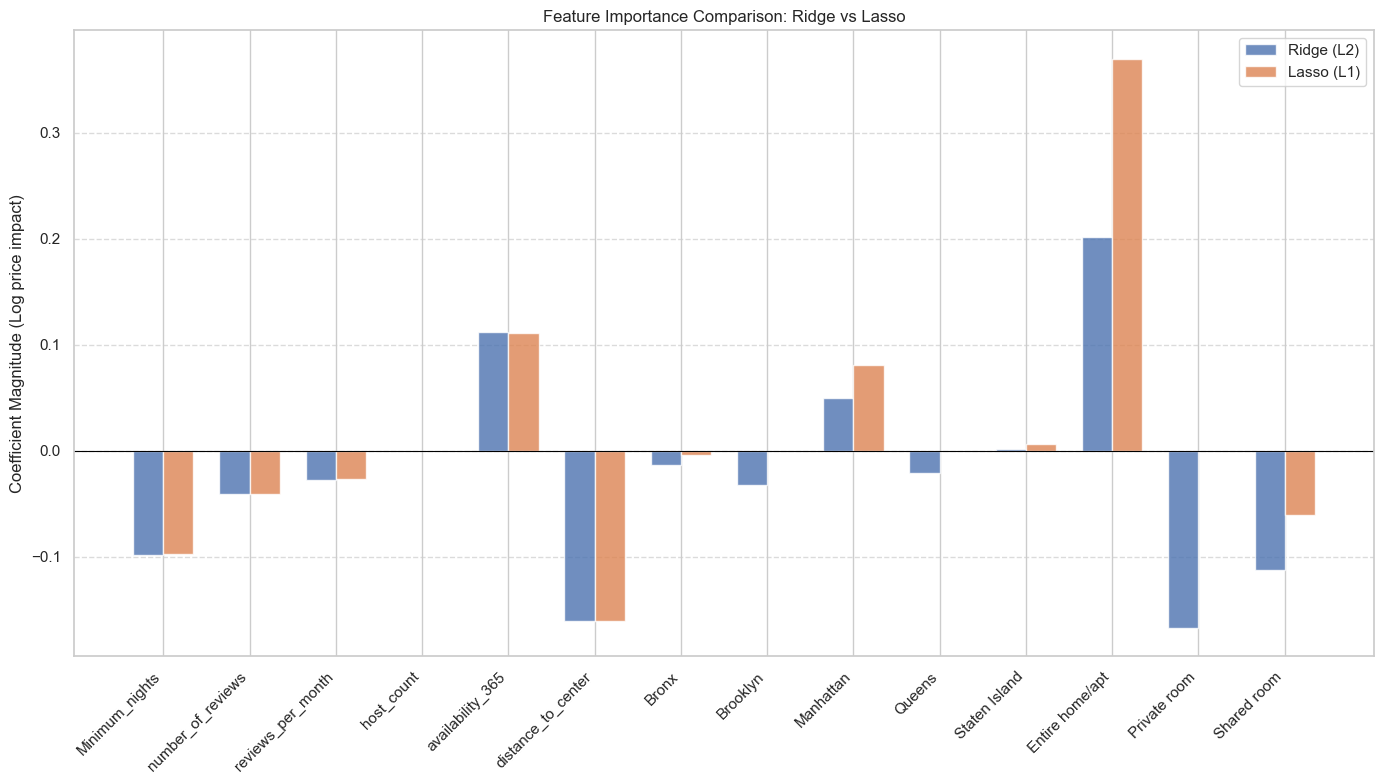

In [24]:
w_ridge = ridge.weights[1:]
w_lasso = lasso.weights[1:]
feats = feature_names[1:]

x_pos = np.arange(len(feats))
width = 0.35

fig, ax = plt.subplots(figsize=(14, 8))
rects1 = ax.bar(x_pos - width/2, w_ridge, width, label='Ridge (L2)', alpha=0.8)
rects2 = ax.bar(x_pos + width/2, w_lasso, width, label='Lasso (L1)', alpha=0.8)

ax.set_ylabel('Coefficient Magnitude (Log price impact)')
ax.set_title('Feature Importance Comparison: Ridge vs Lasso')
ax.set_xticks(x_pos)
ax.set_xticklabels(feats, rotation=45, ha='right')
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Thêm đường 0 để dễ nhìn
ax.axhline(0, color='black', linewidth=0.8)

plt.tight_layout()
plt.show()

**Nhận xét:**

1. Lasso gán hệ số bằng `0` cho 2 giá trị địa lý **Brooklyn, Queens** và biến `Private room`.

2. Việc Lasso loại bỏ `host_count` và Ridge "gần như" loại bỏ `host_cost` cho thấy: không có mối quan hệ tuyến tính rõ ràng giữa `host_count` và `price`. Hay việc một host có nhiều nhà không đồng nghĩa với việc họ set giá cao hơn hay thấp hơn một cách nhất quán (thật ra cũng khá hiển nhiên).

2. Khác biệt bất giờ của 2 Model: Lasso dồn toàn bộ trọng số dương cực đại vào `Entire home` và bỏ qua `Private room`. Ngược lại, Ridge gán trọng số dương thấp hơn cho `Entire home` nhưng lại gán trọng số âm cho `Private room` và trọng số âm lớn hơn cho `Shared room`.

3. Cả ba mô hình đều thống nhất rằng `distance_to_center` (tác động âm mạnh nhất) và `availability_365` (tác động dương ổn định) là hai feature quan trọng nhất. Đây là những yếu tố có mối quan hệ tuyến tính rõ ràng với giá và ít bị nhiễu.

4. Dù kết quả R2-score tương đương, Lasso vẫn được ưu tiên hơn trong bài toán kinh doanh thực tế vì nó giúp đơn giản hóa mô hình (loại được các đặc trưng không cần thiết) mà không làm giảm độ chính xác (xét RIÊNG trên bài toán này).

### **2. Residual Plots**

**LINEAR REGRESSION**

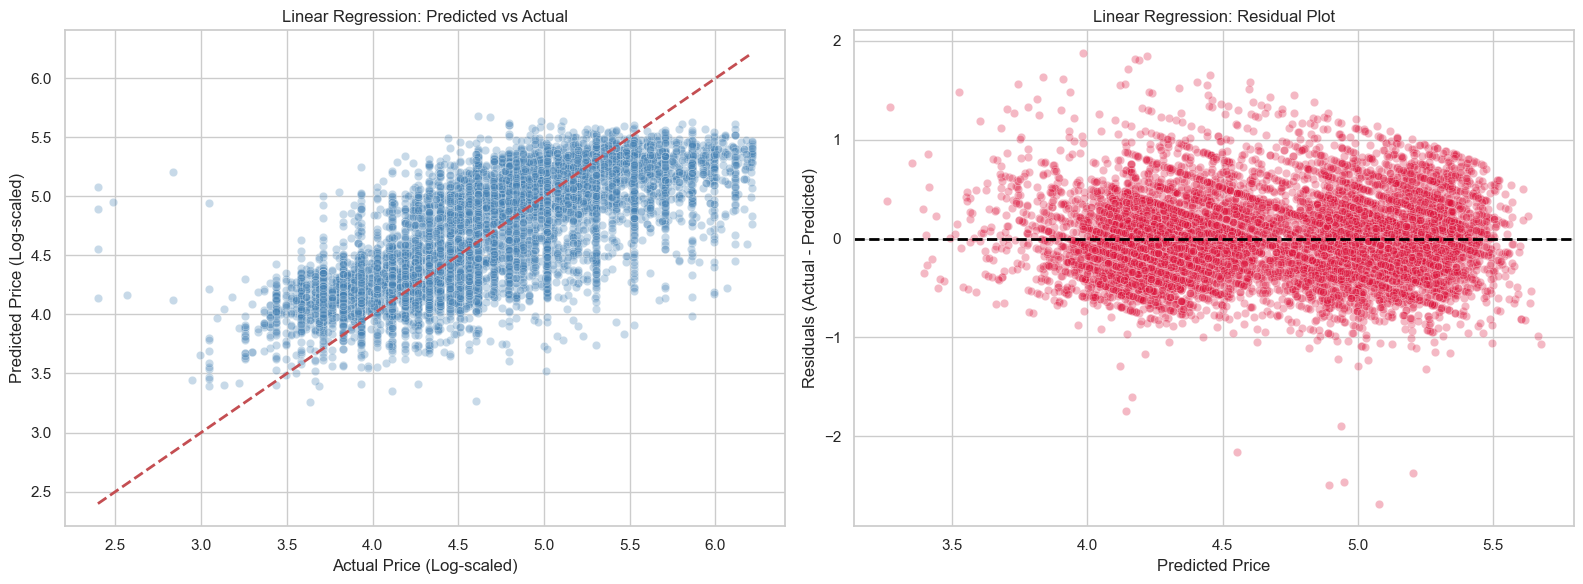

In [25]:
src.residual_plots(y_test, y_pred_linear, "Linear Regression")

**RIDGE REGRESSION**

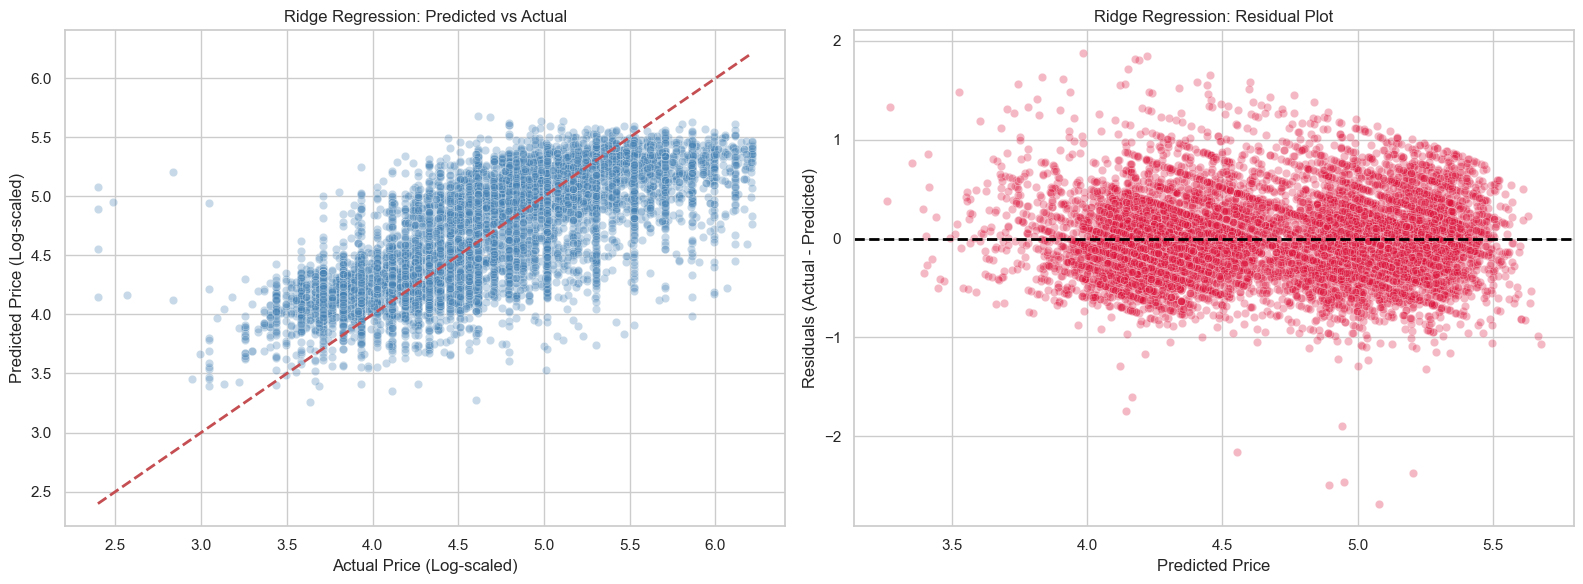

In [26]:
src.residual_plots(y_test, y_pred_ridge, "Ridge Regression")

**LASSO REGRESSION**

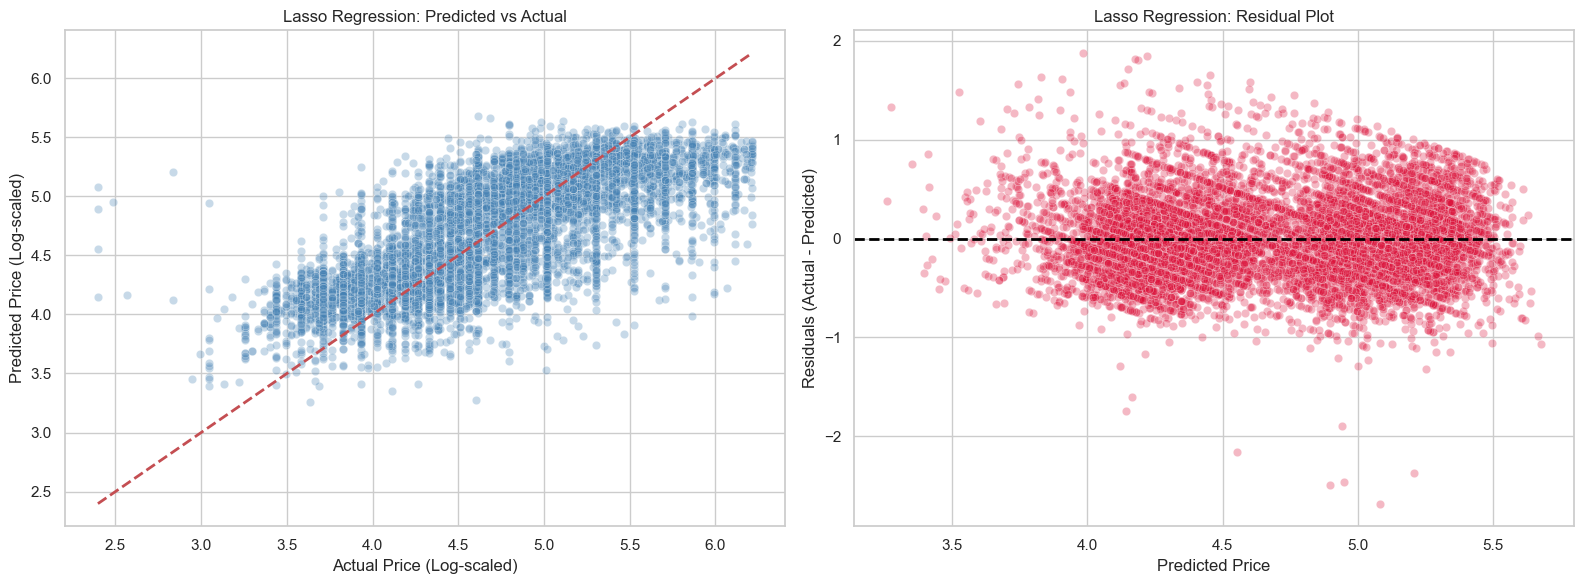

In [27]:
src.residual_plots(y_test, y_pred_lasso, "Lasso Regression")

**KẾT LUẬN CHUNG**

Do cả 3 Model cho ra kết quả khá tương đồng nên em sẽ nhận xét chung một lần.

*Kết quả khẳng định rằng:* 
- Dù đã được loại bớt dữ liệu `0` và log-scale tuy nhiên Model bị chi phối bởi những số `0` còn lại (Có thể xem đây là một trong những điểm yếu của log-scale, tại nó không xử lý được số `0`).  
- Mô hình có xu hướng dự đoán an toàn ở mức trung bình và thất bại trong việc bắt kịp mức giá của phân khúc cao cấp (High-end listings).

Dù Ridge và Lasso đã giúp kiểm soát trọng số và chọn lọc đặc trưng, nhưng nó vẫn là một mô hình tuyến tính (Đơn giản, không phù hợp với những loại dữ liệu biến động và phức tạp như tập dữ liệu này).
